# Objective: display an ECG according to standards

## 1.1.2. Download the file

In [3]:
import os
if os.getcwd().endswith("notebooks"):
    os.chdir("..")

data = "data/ECGu.txt"

### 1.2. Read the ECG file

In [4]:
import numpy as np 
import matplotlib.pyplot as plt

ecg = np.loadtxt(data)

In [5]:
print(ecg)

[[-275. -119. -119.]
 [-275. -119. -119.]
 [-275. -118. -121.]
 ...
 [  -4.  -83.   21.]
 [  -9.  -88.   31.]
 [ -16.  -96.   33.]]


## STEP 2 
- Display the contents of this file
- Display graphs of the file contents with the correct scale, labels,
and format.

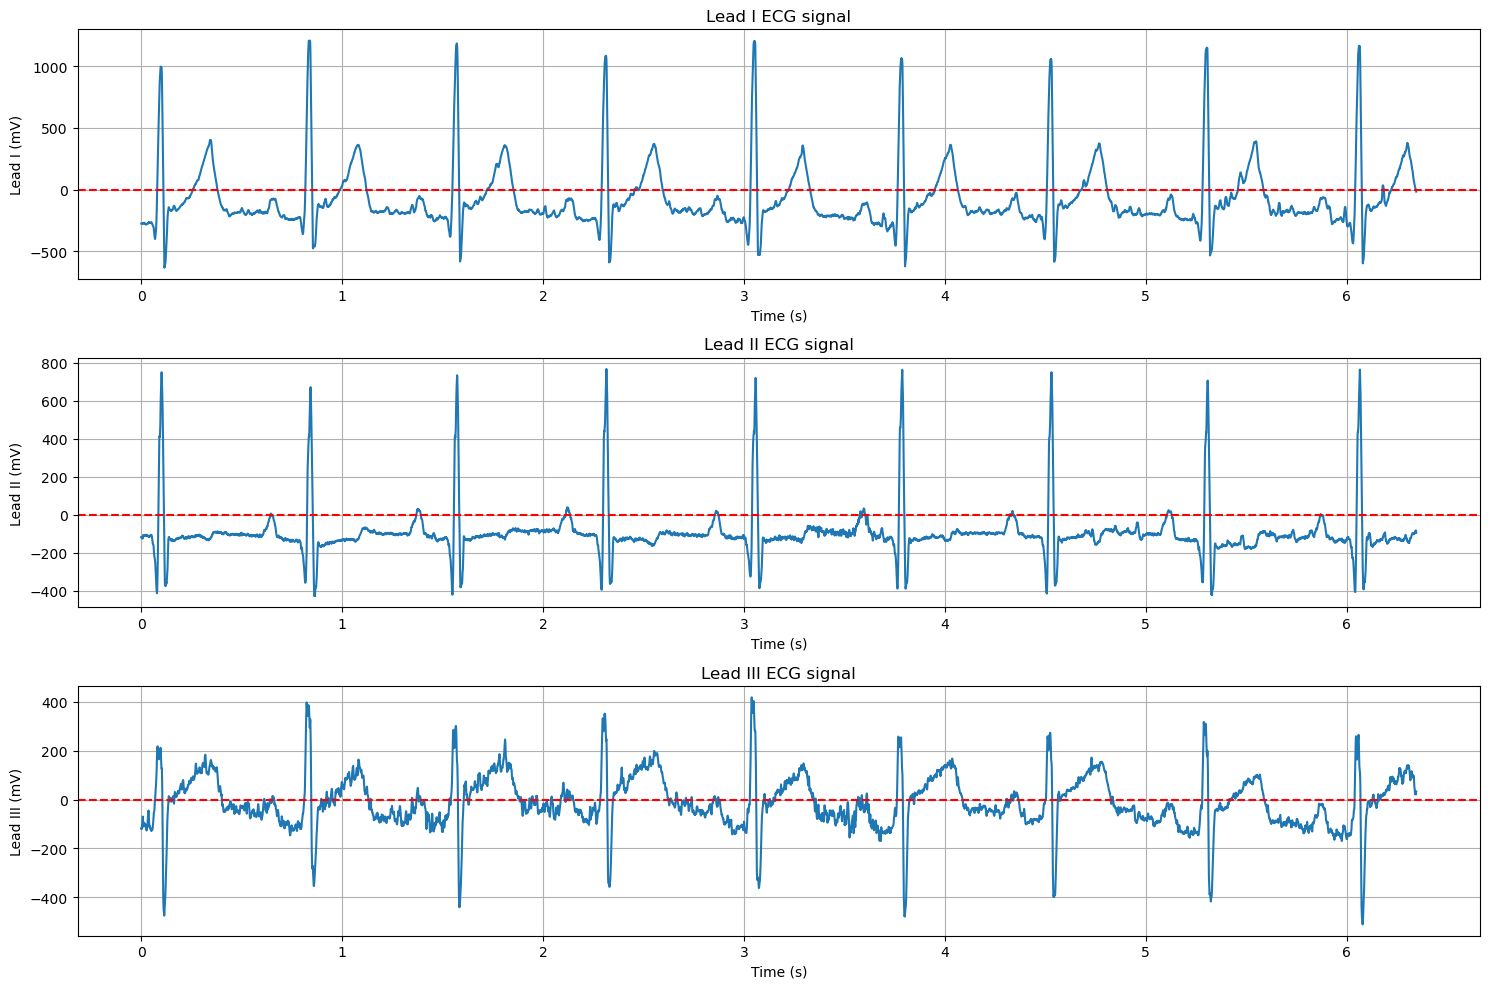

In [6]:
# settings
sampling_frequency = 1024  # Hz
gain = 520  # µV

# Create time axis (in seconds)
time = np.arange(len(ecg)) / sampling_frequency

# Create a figure with 3 subplots for each lead
plt.figure(figsize=(15, 10))

# Plot Lead I
plt.subplot(3, 1, 1)  # 3 rows, 1 column, 1st subplot
plt.plot(time, ecg[:, 0])  
plt.axhline(0, color='red', linestyle='--') 
plt.title('Lead I ECG signal')
plt.xlabel('Time (s)')
plt.ylabel('Lead I (mV)')
plt.grid(True)

# Plot Lead II
plt.subplot(3, 1, 2)  
plt.plot(time, ecg[:, 1])  
plt.axhline(0, color='red', linestyle='--') 
plt.title('Lead II ECG signal')
plt.xlabel('Time (s)')
plt.ylabel('Lead II (mV)')
plt.grid(True)

# Plot Lead III
plt.subplot(3, 1, 3) 
plt.plot(time, ecg[:, 2])  
plt.axhline(0, color='red', linestyle='--') 
plt.title('Lead III ECG signal')
plt.xlabel('Time (s)')
plt.ylabel('Lead III (mV)')
plt.grid(True)

# Display the plots
plt.tight_layout()  
plt.show()


### Lead II is considered the most representative in ECG recordings because of its anatomical alignment with the heart's electrical axis.

###  Answer the following questions:
- Does this ECG look correctly scaled to you?
- Is this a normal ECG?

 ##### For me, this ECG appears to be incorrectly scaled, with amplitudes that seem too high and a baseline that should be closer to zero, potentially due to sensor calibration issues. However, the shape of the ECG looks normal, with clearly visible P waves, QRS complexes, and T waves, suggesting a sinus rhythm and normal cardiac electrical activity.

##  Part II: 

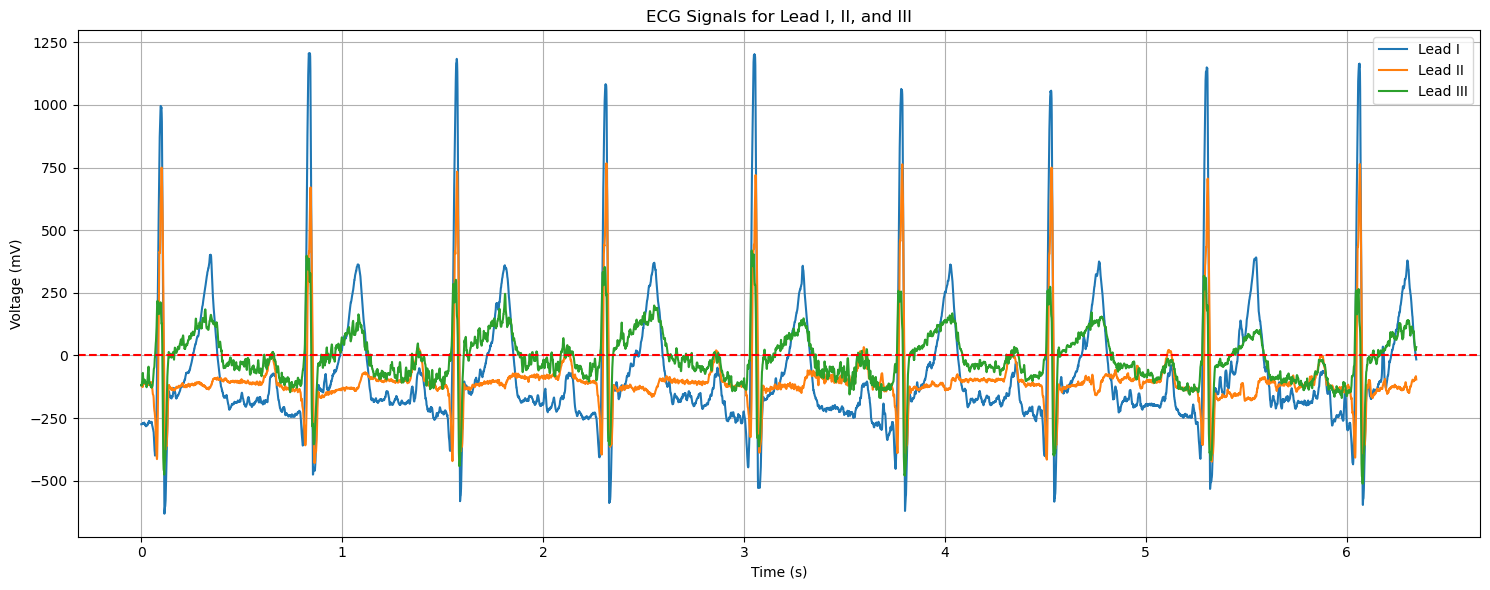

In [7]:
plt.figure(figsize=(15, 6))

# Plot Lead I, Lead II, Lead III on the same plot
plt.plot(time, ecg[:, 0], label='Lead I')  # Lead I
plt.plot(time, ecg[:, 1], label='Lead II')  # Lead II
plt.plot(time, ecg[:, 2], label='Lead III')  # Lead III

# Add a horizontal line at y=0
plt.axhline(0, color='red', linestyle='--') 

plt.title('ECG Signals for Lead I, II, and III')
plt.xlabel('Time (s)')
plt.ylabel('Voltage (mV)')
plt.grid(True)

# Add a legend to distinguish the leads
plt.legend()

# Display the plot
plt.tight_layout()
plt.show()

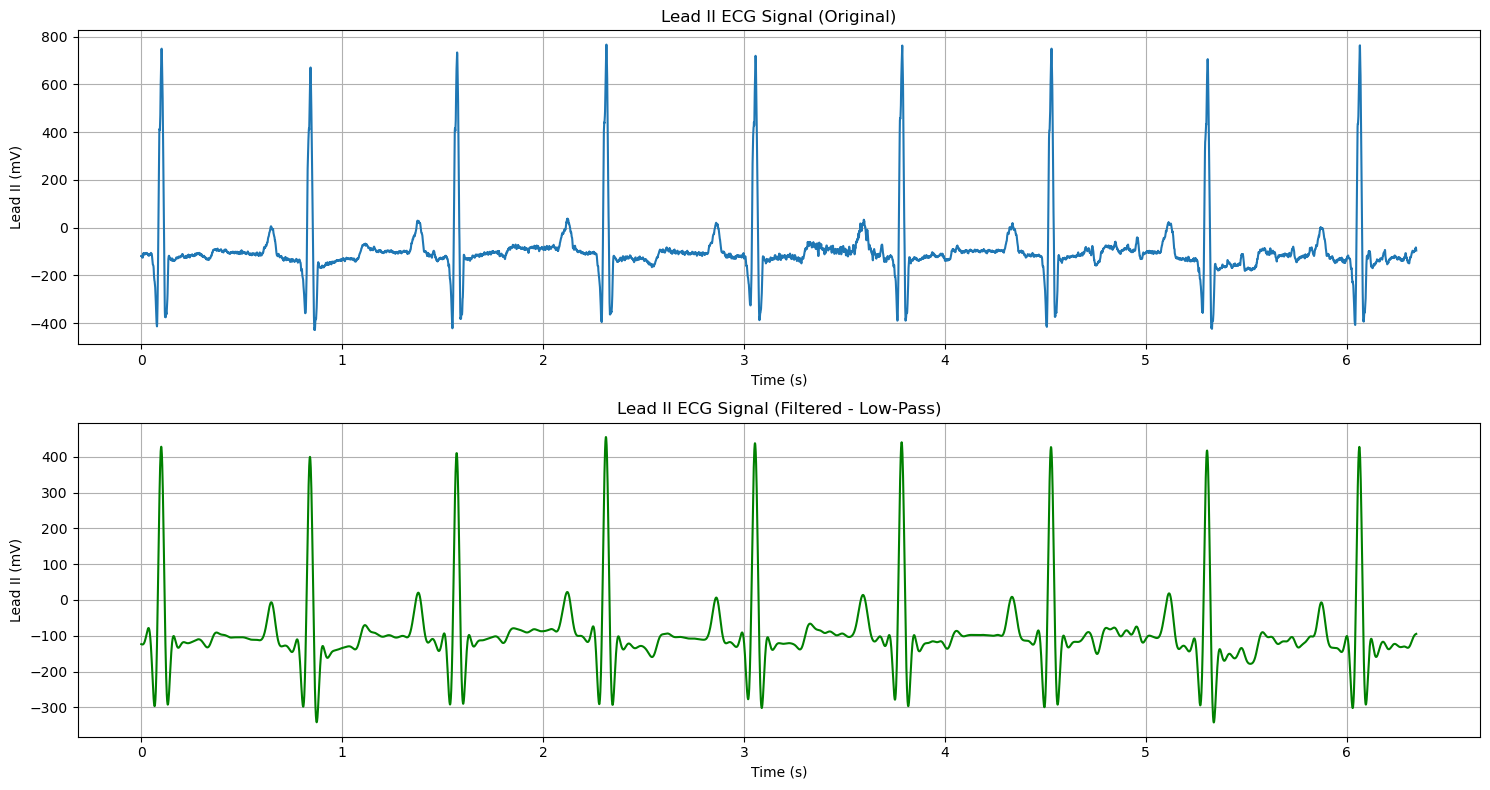

In [8]:
from scipy.signal import butter, filtfilt

# settings
sampling_frequency = 1024  # Hz
cutoff_frequency = 20  # Hz (cutoff for the low-pass filter)
order = 4  # Order of the filter

# Create time axis (in seconds)
time = np.arange(len(ecg)) / sampling_frequency

# Lead II signal (original)
lead_2 = ecg[:, 1]

# Step 1: Design a low-pass filter using Butterworth
def butter_lowpass(cutoff, fs, order=4):
    nyquist = 0.5 * fs  # Nyquist frequency
    normal_cutoff = cutoff / nyquist  # Normalized cutoff frequency
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    return b, a

# Step 2: Apply the low-pass filter to the Lead II signal
def apply_lowpass_filter(data, cutoff, fs, order=4):
    b, a = butter_lowpass(cutoff, fs, order=order)
    y = filtfilt(b, a, data)
    return y

# Apply the low-pass filter
filtered_lead_2 = apply_lowpass_filter(lead_2, cutoff_frequency, sampling_frequency, order)

# Step 3: Create a figure with two subplots
plt.figure(figsize=(15, 8))

# Plot Lead II original (top)
plt.subplot(2, 1, 1)
plt.plot(time, lead_2, label='Lead II Original')
plt.title('Lead II ECG Signal (Original)')
plt.xlabel('Time (s)')
plt.ylabel('Lead II (mV)')
plt.grid(True)

# Plot Lead II filtered (bottom)
plt.subplot(2, 1, 2)
plt.plot(time, filtered_lead_2, label='Lead II with Low-Pass Filter', color='green')
plt.title('Lead II ECG Signal (Filtered - Low-Pass)')
plt.xlabel('Time (s)')
plt.ylabel('Lead II (mV)')
plt.grid(True)

# Display the plots
plt.tight_layout()
plt.show()


## I normalized the ECG signal between 0.35 and 1 to make the ECG more appropriately scaled. 

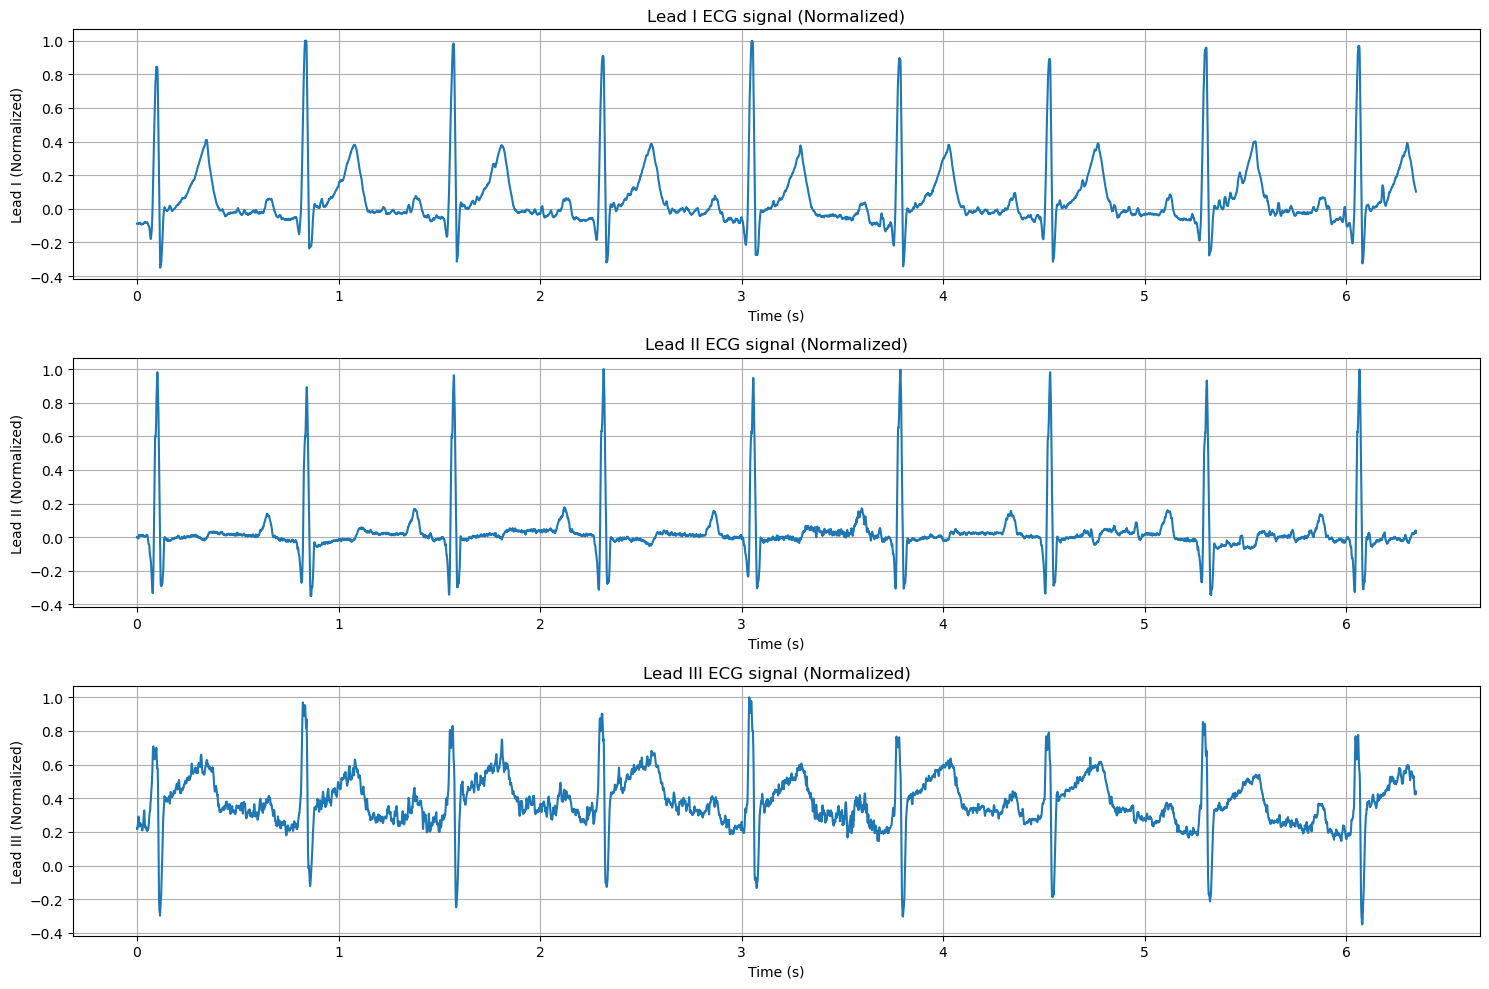

In [19]:
from sklearn.preprocessing import MinMaxScaler

# Normalize ECG data
scaler = MinMaxScaler(feature_range=(-0.35, 1)) 
ecg_normalized = scaler.fit_transform(ecg)


plt.figure(figsize=(15, 10))


plt.subplot(3, 1, 1)
plt.plot(time, ecg_normalized[:, 0])  
plt.title('Lead I ECG signal (Normalized)')
plt.xlabel('Time (s)')
plt.ylabel('Lead I (Normalized)')
plt.grid(True)


plt.subplot(3, 1, 2)
plt.plot(time, ecg_normalized[:, 1])  
plt.title('Lead II ECG signal (Normalized)')
plt.xlabel('Time (s)')
plt.ylabel('Lead II (Normalized)')
plt.grid(True)

plt.subplot(3, 1, 3)
plt.plot(time, ecg_normalized[:, 2])  
plt.title('Lead III ECG signal (Normalized)')
plt.xlabel('Time (s)')
plt.ylabel('Lead III (Normalized)')
plt.grid(True)


plt.tight_layout()
plt.show()
